# Changing optimisation parameters


In [2]:
import os
import pickle
from keras.layers import Dense
from keras.models import Sequential

DATA_PATH = "../data/raw"

input_shape = (10,)


In [3]:
predictors = pickle.load(open(os.path.join(DATA_PATH, "predictors.pkl"), "rb")).astype(
    int
)
target = pickle.load(open(os.path.join(DATA_PATH, "target.pkl"), "rb"))


In [4]:
def get_new_model(input_shape = input_shape):
    model = Sequential()
    model.add(Dense(100, activation='relu', input_shape = input_shape))
    model.add(Dense(100, activation='relu'))
    model.add(Dense(2, activation='softmax'))
    return(model)

In [5]:
# Import the SGD optimizer
from tensorflow.keras.optimizers import SGD

# Create list of learning rates: lr_to_test
lr_to_test = [0.000001, 0.01, 1]

# Loop over learning rates
for lr in lr_to_test:
    print("\n\nTesting model with learning rate: %f\n" % lr)

    # Build new model to test, unaffected by previous models
    model = get_new_model()

    # Create SGD optimizer with specified learning rate: my_optimizer
    my_optimizer = SGD(lr=lr)

    # Compile the model
    model.compile(optimizer=my_optimizer, loss="categorical_crossentropy")

    # Fit the model
    model.fit(predictors, target)




Testing model with learning rate: 0.000001



2022-03-05 18:37:13.771105: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_UNKNOWN: unknown error
2022-03-05 18:37:13.771241: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:169] retrieving CUDA diagnostic information for host: optimus
2022-03-05 18:37:13.771274: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:176] hostname: optimus
2022-03-05 18:37:13.771501: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:200] libcuda reported version is: 470.42.1
2022-03-05 18:37:13.771582: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:204] kernel reported version is: 470.42.1
2022-03-05 18:37:13.771606: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:310] kernel version seems to match DSO: 470.42.1
2022-03-05 18:37:13.772256: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical oper

28/28 [==============================] - 1s 1ms/step - loss: 3.4929


Testing model with learning rate: 0.010000

28/28 [==============================] - 0s 1ms/step - loss: 1.5245


Testing model with learning rate: 1.000000

28/28 [==============================] - 0s 1ms/step - loss: 50376548024320.0000


## Validation set


In [6]:
# Save the number of columns in predictors: n_cols
n_cols = predictors.shape[1]
input_shape = (n_cols,)

# Specify the model
model = Sequential()
model.add(Dense(100, activation='relu', input_shape = input_shape))
model.add(Dense(100, activation='relu'))
model.add(Dense(2, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Fit the model
hist = model.fit(predictors, target, validation_split=.3)


20/20 [==============================] - 1s 10ms/step - loss: 1.1591 - accuracy: 0.5730 - val_loss: 0.7974 - val_accuracy: 0.6455


## Early stopping


In [7]:
# Import EarlyStopping
from keras.callbacks import EarlyStopping

# Save the number of columns in predictors: n_cols
n_cols = predictors.shape[1]
input_shape = (n_cols,)

# Specify the model
model = Sequential()
model.add(Dense(100, activation="relu", input_shape=input_shape))
model.add(Dense(100, activation="relu"))
model.add(Dense(2, activation="softmax"))

# Compile the model
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

# Define early_stopping_monitor
early_stopping_monitor = EarlyStopping(patience=2)

# Fit the model
_ = model.fit(
    predictors,
    target,
    callbacks=[early_stopping_monitor],
    epochs=30,
    validation_split=0.3,
)


Epoch 1/30
20/20 [==============================] - 1s 14ms/step - loss: 1.1333 - accuracy: 0.5827 - val_loss: 0.5553 - val_accuracy: 0.7090
Epoch 2/30
20/20 [==============================] - 0s 3ms/step - loss: 0.7499 - accuracy: 0.6148 - val_loss: 0.5451 - val_accuracy: 0.7313
Epoch 3/30
20/20 [==============================] - 0s 3ms/step - loss: 0.6377 - accuracy: 0.6726 - val_loss: 0.5842 - val_accuracy: 0.7463
Epoch 4/30
20/20 [==============================] - 0s 4ms/step - loss: 0.6085 - accuracy: 0.6902 - val_loss: 0.5227 - val_accuracy: 0.7612
Epoch 5/30
20/20 [==============================] - 0s 4ms/step - loss: 0.6085 - accuracy: 0.6998 - val_loss: 0.5057 - val_accuracy: 0.7612
Epoch 6/30
20/20 [==============================] - 0s 4ms/step - loss: 0.6091 - accuracy: 0.6950 - val_loss: 0.4869 - val_accuracy: 0.7836
Epoch 7/30
20/20 [==============================] - 0s 3ms/step - loss: 0.5721 - accuracy: 0.7271 - val_loss: 0.6516 - val_accuracy: 0.6754
Epoch 8/30
20/20 [=

In [8]:
import matplotlib.pyplot as plt
from pylab import rcParams
from keras.models import load_model

rcParams["figure.figsize"] = (16, 9)
model_1 = load_model(os.path.join(DATA_PATH, "model_1.h5"))


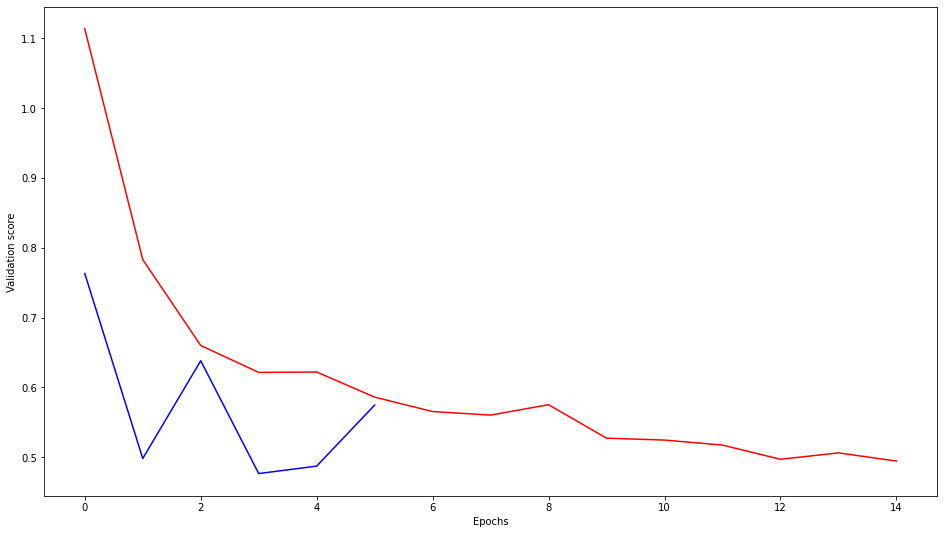

In [9]:
# Define early_stopping_monitor
early_stopping_monitor = EarlyStopping(patience=2)

# Create the new model: model_2
model_2 = Sequential()

# Add the first and second layers
model_2.add(Dense(100, activation="relu", input_shape=input_shape))
model_2.add(Dense(100, activation="relu"))

# Add the output layer
model_2.add(Dense(2, activation="softmax"))

# Compile model_2
model_2.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

# Fit model_1
model_1_training = model_1.fit(
    predictors,
    target,
    epochs=15,
    validation_split=0.2,
    callbacks=[early_stopping_monitor],
    verbose=False,
)

# Fit model_2
model_2_training = model_2.fit(
    predictors,
    target,
    epochs=15,
    validation_split=0.2,
    callbacks=[early_stopping_monitor],
    verbose=False,
)

# Create the plot
plt.plot(
    model_1_training.history["val_loss"], "r", model_2_training.history["val_loss"], "b"
)
plt.xlabel("Epochs")
plt.ylabel("Validation score")
plt.show()


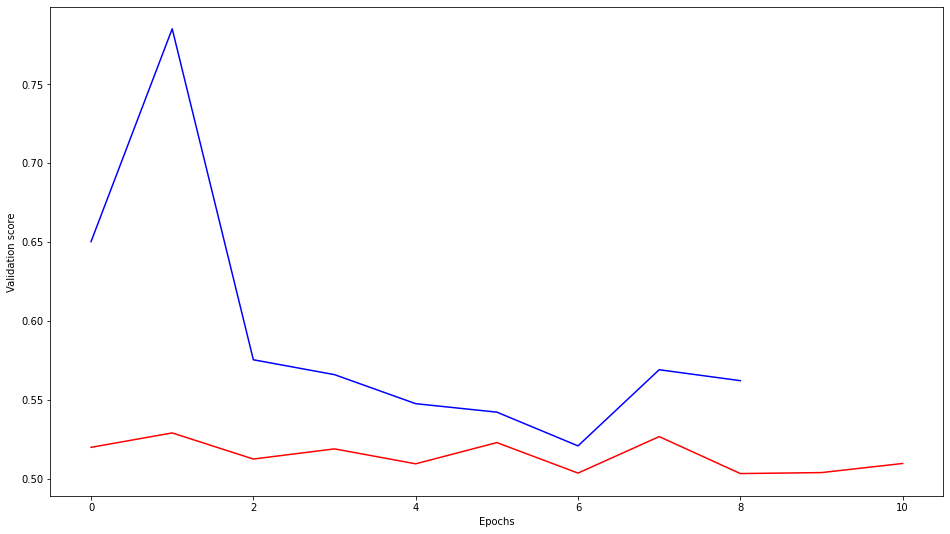

In [10]:
# The input shape to use in the first hidden layer
input_shape = (n_cols,)

# Create the new model: model_2
model_2 = Sequential()

# Add the first, second, and third hidden layers
model_2.add(Dense(50, activation="relu", input_shape=input_shape))
model_2.add(Dense(50, activation="relu"))
model_2.add(Dense(50, activation="relu"))

# Add the output layer
model_2.add(Dense(2, activation="softmax"))

# Compile model_2
model_2.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

# Fit model 1
model_1_training = model_1.fit(
    predictors,
    target,
    epochs=20,
    validation_split=0.4,
    callbacks=[early_stopping_monitor],
    verbose=False,
)

# Fit model 2
model_2_training = model_2.fit(
    predictors,
    target,
    epochs=20,
    validation_split=0.4,
    callbacks=[early_stopping_monitor],
    verbose=False,
)

# Create the plot
plt.plot(
    model_1_training.history["val_loss"], "r", model_2_training.history["val_loss"], "b"
)
plt.xlabel("Epochs")
plt.ylabel("Validation score")
plt.show()


## Images


In [16]:
import numpy as np

X = np.fromfile(os.path.join(DATA_PATH, "X.csv"), sep=",").reshape(2500, 784)
y = np.fromfile(os.path.join(DATA_PATH, "y.csv"), sep=",").reshape(2500, 10)


In [18]:
# Create the model: model
model = Sequential()

# Add the first hidden layer
model.add(Dense(50, activation="relu", input_shape=(784,)))

# Add the second hidden layer
model.add(Dense(50, activation="relu"))

# Add the output layer
model.add(Dense(10, activation="softmax"))

# Compile the model
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

# Fit the model
model.fit(X, y, validation_split=0.3)


55/55 [==============================] - 1s 4ms/step - loss: 1.6042 - accuracy: 0.5560 - val_loss: 0.9771 - val_accuracy: 0.7653
